In [100]:
import os
import os.path as op
# import mne
import numpy as np
import re
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
from scipy.stats import ttest_1samp

In [102]:
data = {}
root = Path('../data/bids/derivatives/decoding')
for file in root.rglob("*"):
    if 'log_reg_scores.npy' not in file.name:
        continue
    key = re.findall('(.*?)_desc', file.name)[0]
    value = np.load(file)
    data[key] = value

df = pd.DataFrame.from_dict(data)
df = df.transpose()
df

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
sub-13_task-pitch_run-1,0.208506,0.208743,0.206113,0.204205,0.203252,0.199666,0.203250,0.199664,0.202291,0.200141,...,0.196559,0.194648,0.195843,0.198714,0.195840,0.203013,0.202295,0.199425,0.195120,0.196313
sub-14_task-pitch_run-1,0.195173,0.197501,0.201947,0.209567,0.207237,0.209991,0.205330,0.209140,0.210199,0.209567,...,0.188822,0.189246,0.186706,0.186916,0.187128,0.187130,0.190303,0.190727,0.189247,0.189882
sub-15_task-pitch_run-1,0.198649,0.199689,0.203856,0.207761,0.207240,0.211146,0.205419,0.209324,0.203595,0.198910,...,0.201509,0.203855,0.199689,0.204114,0.203853,0.204633,0.206456,0.203594,0.201248,0.197083
sub-12_task-pitch_run-1,0.197500,0.198750,0.198333,0.197500,0.199375,0.200625,0.196875,0.196458,0.197292,0.201458,...,0.190833,0.193125,0.198125,0.198958,0.197917,0.201042,0.202708,0.197500,0.195000,0.198333
sub-6_task-pitch_run-1,0.191245,0.192714,0.196904,0.197323,0.199208,0.200883,0.201511,0.205909,0.207165,0.209050,...,0.202554,0.200040,0.199623,0.198786,0.200253,0.196480,0.196271,0.195853,0.196063,0.203395
sub-8_task-pitch_run-1,0.203850,0.205152,0.204629,0.200466,0.196301,0.192919,0.195521,0.200726,0.198386,0.195523,...,0.193699,0.193435,0.198644,0.193179,0.193699,0.194740,0.194741,0.199426,0.196823,0.199946
sub-9_task-pitch_run-1,0.303953,0.330322,0.351137,0.374736,0.421232,0.445540,0.461508,0.483019,0.505243,0.528148,...,0.428883,0.402499,0.373356,0.349748,0.324774,0.315758,0.292164,0.279666,0.264396,0.258165
sub-7_task-pitch_run-1,0.192655,0.187710,0.185889,0.190314,0.192137,0.191879,0.194743,0.197344,0.198386,0.198904,...,0.193701,0.190838,0.192399,0.196825,0.197607,0.196304,0.194486,0.195003,0.192138,0.195263
sub-17_task-pitch_run-1,0.198908,0.191357,0.192398,0.192659,0.192398,0.189798,0.190839,0.194222,0.200213,0.196568,...,0.199164,0.195783,0.202291,0.192917,0.190314,0.193699,0.193440,0.195003,0.195524,0.187976
sub-10_task-pitch_run-1,0.199432,0.196047,0.195526,0.196825,0.195264,0.197607,0.197346,0.196564,0.197085,0.200469,...,0.203587,0.204108,0.202810,0.196303,0.195522,0.195784,0.198908,0.196305,0.198128,0.197344


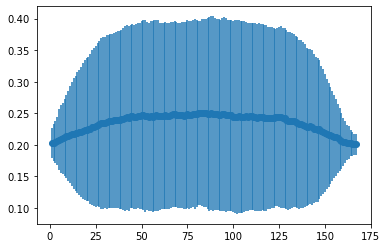

In [116]:
# Mean over subjects
means = df.mean(axis = 0)

# Standard deviation
stds = df.std(axis = 0)

# Plot
x = np.arange(len(means))+1
plt.errorbar(x, means, yerr = stds, fmt = 'o')
plt.show()

In [105]:
# T-tests
results = ttest_1samp(df, popmean = 0.20, axis = 0, alternative = 'greater')
t = results[0]
p = results[1]

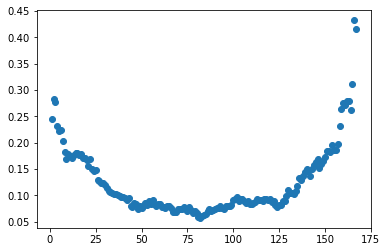

In [118]:
plt.scatter(x, p)
plt.show()

0.057383184954067225

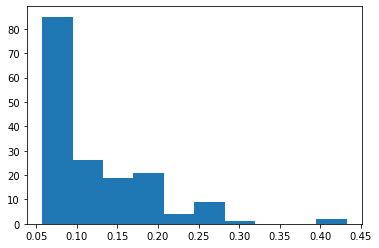

In [120]:
plt.hist(p)
min(p)